In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path="/content/Bengaluru_House_Data.csv"
house=pd.read_csv(path)
df=pd.DataFrame(house)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


Task 2 — Clean the Dataset
Identify and count missing values in each column.

Drop column(s) that are irrelevant for price analysis (example: society or unnamed columns).

Handle missing values in numeric columns such as bath, balcony, etc. (use either dropna() or fillna() depending on your reasoning).

Convert total_sqft to numeric — handle values like "2100 - 2850" by converting them to an average or a single number.

Remove duplicate rows.

6. Reset the DataFrame index after cleaning

In [ ]:
df.drop(['society'],axis=1,inplace=True)


In [ ]:
df['bath'].fillna(df['bath'].median(),inplace=True)
df['balcony'].fillna(0,inplace=True)

/tmp/ipython-input-3530379219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(),inplace=True)
/tmp/ipython-input-3530379219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None

df['total_sqft']=df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [ ]:
df['location'].nunique()

1299

In [ ]:
df.groupby('location')['price'].mean()

,price
location,
Anekal,16.000000
Banaswadi,35.000000
Basavangudi,50.000000
Bhoganhalli,22.890000
Devarabeesana Halli,124.833333
...,...
t.c palya,160.000000
tc.palya,60.750000
vinayakanagar,200.000000


In [ ]:
df.groupby('location')['price'].mean().nlargest(1)

,price
location,
Cubbon Road,1900.0


In [ ]:
corr=df[['total_sqft','bath','price']].corr()
print(corr)

            total_sqft      bath     price
total_sqft    1.000000  0.385367  0.573858
bath          0.385367  1.000000  0.450564
price         0.573858  0.450564  1.000000


In [ ]:
corr_sqft_price = corr.loc['total_sqft', 'price']


if corr_sqft_price > 0.7:
    print("• Strong positive correlation → Larger houses generally have higher prices.")
elif corr_sqft_price > 0.4:
    print("• Moderate correlation → Larger houses often cost more, but not always.")
else:
    print("• Weak correlation → Size alone does NOT determine price.")


• Moderate correlation → Larger houses often cost more, but not always.


Task 4 — Data Visualization

Use the specific visualization types mentioned for each question.
Price Distribution:

Plot the distribution of the price column using a Histogram + KDE curve.

Relationship Between Area and Price:

Visualize the relationship between total_sqft and price using a Scatter Plot.

Effect of Bathrooms on Price:

Show how bath count affects house prices using a Box Plot.

Top 10 Most Expensive Locations:

Plot the Top 10 locations with highest average price using a Bar Chart.

Correlation Between Numeric Columns:

Create a Heatmap to visualize correlations among numeric features (price, total_sqft, bath, balcony, etc.).


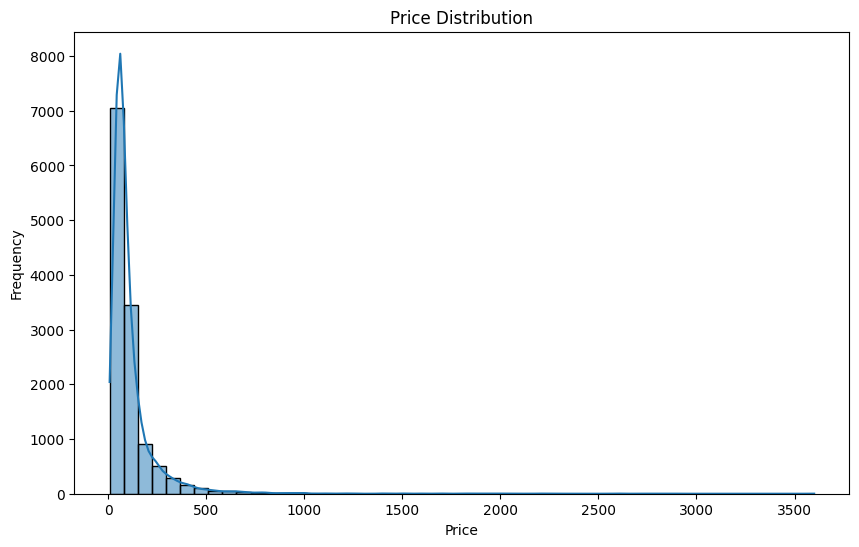

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', kde=True, bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Text(0, 0.5, 'price')

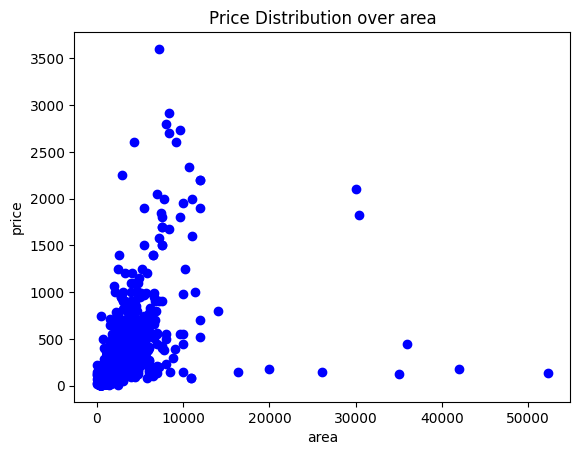

In [ ]:
plt.scatter(df['total_sqft'],df['price'],color="blue")

plt.title('Price Distribution over area')
plt.xlabel('area')
plt.ylabel('price')



Text(0, 0.5, 'price')

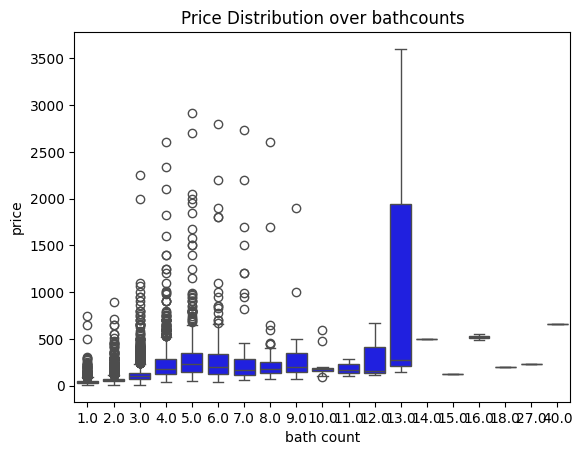

In [ ]:
sns.boxplot(x=df['bath'],y=df['price'],color="blue")

plt.title('Price Distribution over bathcounts')
plt.xlabel('bath count')
plt.ylabel('price')

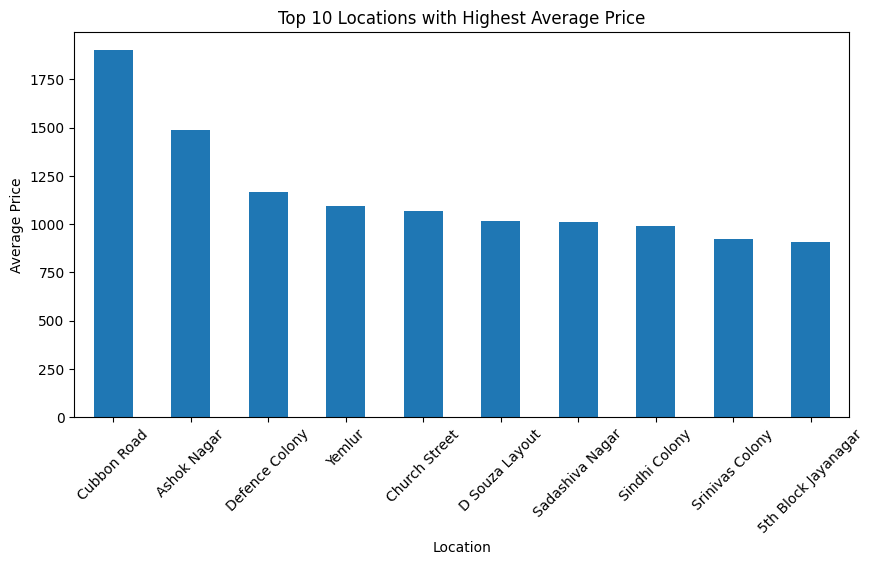

In [ ]:
top10 = df.groupby('location')['price'].mean().nlargest(10)

top10.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Locations with Highest Average Price")
plt.ylabel("Average Price")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.show()


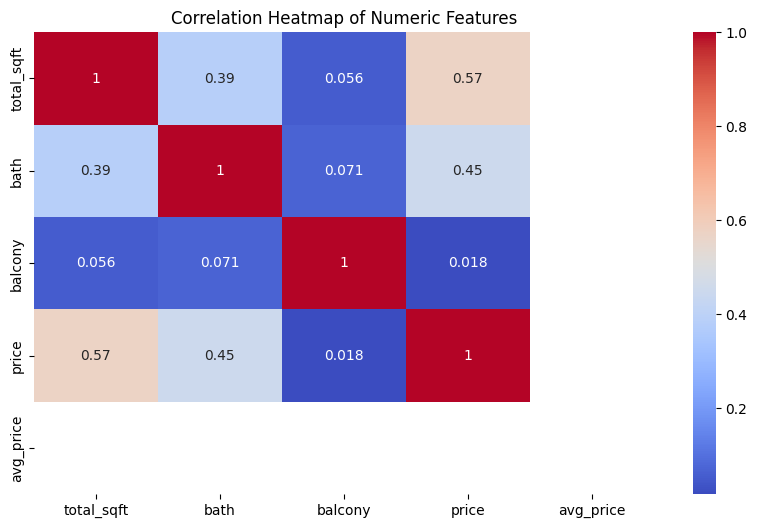

In [ ]:

num_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = num_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [ ]:

df.to_csv("filtered_house_price.csv", index=False)

In [ ]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path="/content/Amazon_electronics.csv"
df=pd.read_csv(path,header=0)

print(df.head())
print(df.tail())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    166    216206  4.0  2014-01-27       Female  Computers & Accessories  \
0  1692  216207.0  5.0  2014-01-27         Male   Accessories & Supplies   
1  1156  216208.0  4.0  2014-01-27       Female           Camera & Photo   
2  2053  216209.0  3.0  2014-01-27       Female               Headphones   
3  2722  216210.0  5.0  2014-01-27         Male  Computers & Accessories   
4  1825  216211.0  4.0  2014-01-27  Female&Male               Headphones   

  Unnamed: 6    2013 Female.1    0  
0        NaN  2011.0      NaN  0.0  
1      Nikon  2009.0      NaN  0.0  
2        NaN  2012.0      NaN  0.0  
3        NaN  2013.0      NaN  0.0  
4       Bose  2011.0      NaN  0.0  
         166    216206  4.0  2014-01-27  Female Computers & Accessories  \
800821  1815  926089.0  5.0  2017-01-11  Female  Accessories & Supplies   
800822  1815  926090.0  4.0  2017-01-11  F

In [ ]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97702 entries, 0 to 97701
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   166                      97702 non-null  int64  
 1   216206                   97701 non-null  float64
 2   4.0                      97701 non-null  float64
 3   2014-01-27               97701 non-null  object 
 4   Female                   97701 non-null  object 
 5   Computers & Accessories  97701 non-null  object 
 6   Unnamed: 6               25834 non-null  object 
 7   2013                     97701 non-null  float64
 8   Female.1                 13740 non-null  object 
 9   0                        97701 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 7.5+ MB


Index(['166', '216206', '4.0', '2014-01-27', 'Female',
       'Computers & Accessories', 'Unnamed: 6', '2013', 'Female.1', '0'],
      dtype='object')

In [ ]:
df['product'].nunique()

KeyError: 'product'